In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
                        keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [26]:
# Model 함수 구현

def model_fn(a_layer= None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(10, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [27]:
# 모델 구성 및 Summary
model = model_fn()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 훈련 및
model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(   train_scaled,     train_target, epochs = 5)    


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6688 - loss: 1.0133
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8325 - loss: 0.4827
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8434 - loss: 0.4481
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8536 - loss: 0.4245
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.4190


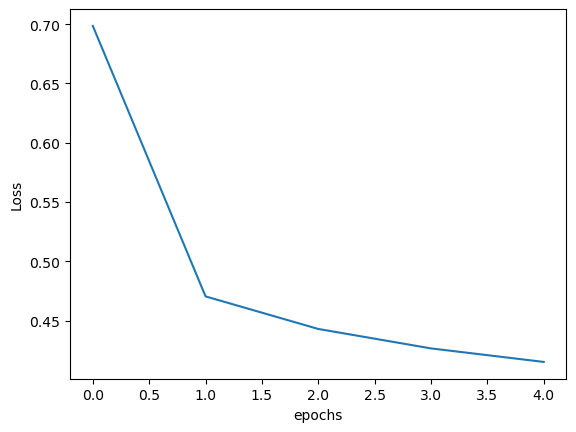

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

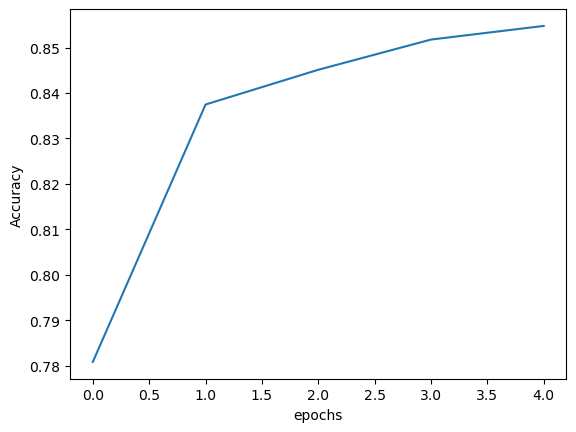

In [14]:
plt.plot(history.history['accuracy'])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

In [15]:
# epochs를 늘리면 정확도가 더 올라가고 손실이 더 떨어질것 같음
# 훈련 및

model = model_fn()
model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit( train_scaled, train_target, epochs = 20)    

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6892 - loss: 0.9497
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8322 - loss: 0.4910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8446 - loss: 0.4497
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8510 - loss: 0.4320
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8534 - loss: 0.4191
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8603 - loss: 0.4077
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8615 - loss: 0.4024
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8677 - loss: 0.3869
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8662 - loss: 0.3910
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8696 - loss: 0.3799
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8671 - loss: 0.3814
Epoch 12/20
1500/1500 ━━━━━━━━

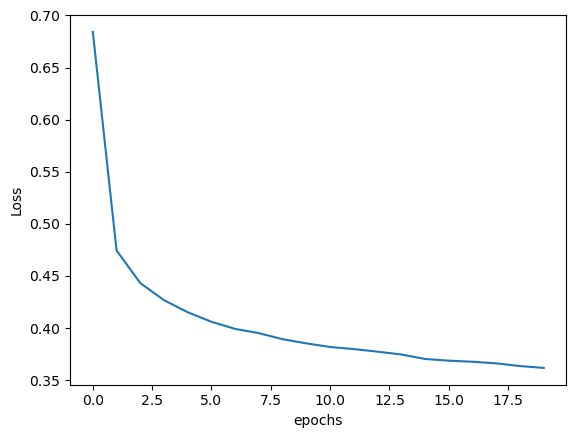

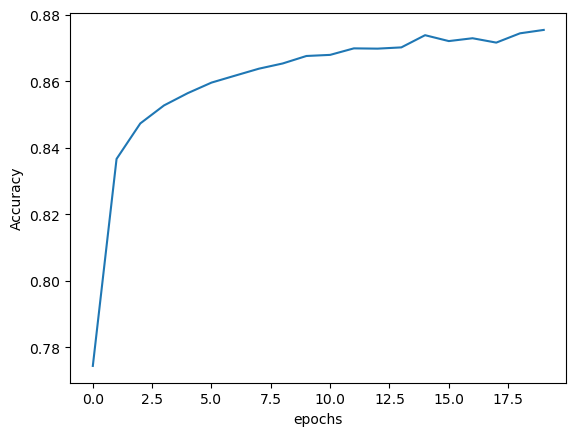

In [16]:
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# 검증 손실
# : 검증세트에 대한 정확도를 파악하기 위해 validation_data를 사용한다.


model = model_fn()
model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit( train_scaled, train_target,
                     epochs = 20,
                     validation_data=(val_scaled, val_target))
                    
                        

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6550 - loss: 1.0308 - val_accuracy: 0.8084 - val_loss: 0.5495
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8186 - loss: 0.5145 - val_accuracy: 0.8352 - val_loss: 0.4815
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8374 - loss: 0.4661 - val_accuracy: 0.8404 - val_loss: 0.4649
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8449 - loss: 0.4412 - val_accuracy: 0.8409 - val_loss: 0.4494
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8492 - loss: 0.4287 - val_accuracy: 0.8493 - val_loss: 0.4379
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8526 - loss: 0.4282 - val_accuracy: 0.8385 - val_loss: 0.4608
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8575 - loss: 0.4104 - val_accuracy: 0.8518 - val_loss: 0.4296
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8561 - loss: 0.4117 - 

In [19]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


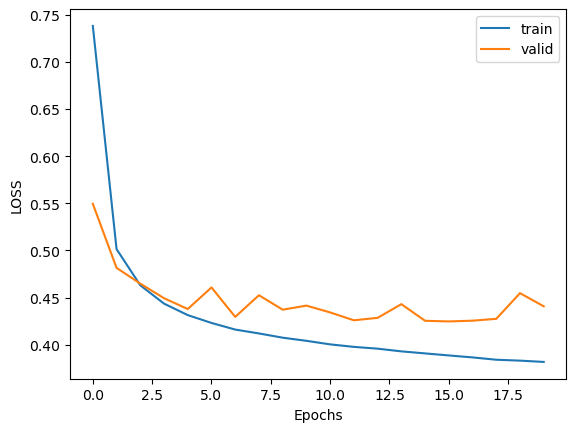

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("LOSS")
plt.legend(['train','valid'])
plt.show()

In [ ]:
# > 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나
# 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 
# 손실율이 증가한다.
# 이 모델은 훈련세트에는 정확도가 높아 좋지만 검증세트에는 적합하지 않은 과대적합 모델이다.